In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

from tqdm import tqdm

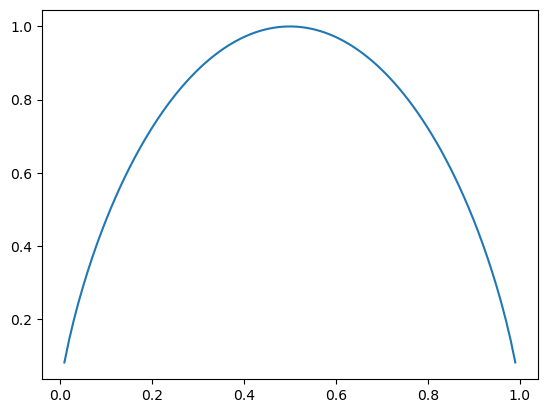

In [5]:
generator = nn.Sequential(
    nn.ConvTranspose2d(10, 1024, 4),
    nn.BatchNorm2d(1024),
    nn.ReLU(),
    nn.ConvTranspose2d(1024, 512, 4, 2),
    nn.BatchNorm2d(512),
    nn.ReLU(),
    nn.ConvTranspose2d(512, 256, 4, 2),
    nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.ConvTranspose2d(256, 128, 4, 1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.ConvTranspose2d(128, 1, 4, 1),
    nn.Sigmoid(),
)

discriminator = nn.Sequential(
    nn.Conv2d(1, 16, 4, 2, 1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(16, 8, 4, 2, 1),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.Conv2d(8, 4, 4, 2, 1),
    nn.BatchNorm2d(4),
    nn.ReLU(),
    nn.Conv2d(4, 1, 3),
    nn.Sigmoid(),
)

opt_g = torch.optim.Adam(generator.parameters())
opt_d = torch.optim.Adam(discriminator.parameters())

criterion = nn.BCELoss()

training_data = datasets.MNIST(
    root="/home/secondvoca/sdc_ae_23/data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

dataloader = DataLoader(training_data, batch_size=128, shuffle=True)